In [2]:
delta_m1545 = -1.545
delta_4455 = 4.455
delta_4955 = 4.955
delta_13455 = 13.455
d_m1545 = '-1.545'
d_4455 = '4.455'
d_4955 = '4.955'
d_13455 = '13.455'

In [3]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [4]:
import sys
sys.path.append('../..')
from dset_helpers import load_KZ_QMC_uncorr_data_from_batches,data_given_param
from stag_mag import calculate_stag_mag

# Load Data

In [7]:
df = pd.read_csv('./../data/N_256/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [8]:
QMC_data = load_KZ_QMC_uncorr_data_from_batches(-1.545,1000)
print(np.shape(QMC_data))

(1000, 256)


In [9]:
Exp_data = data_given_param(15,-1.545)
shots = np.shape(Exp_data)[-1]
Lx = 16
Exp_data = np.reshape(Exp_data,(Lx**2,shots)).T
print(np.shape(Exp_data))

(1000, 256)


# Calculate Stag Mags from data

In [11]:
Lx,Ly = 16,16

In [12]:
QMC_data_stagmags = calculate_stag_mag(Lx,Ly,QMC_data)

In [13]:
Exp_data_stagmags = calculate_stag_mag(Lx,Ly,Exp_data)

In [14]:
deltas = np.arange(-1.545,13.5,0.5)
qmc_stagmags = []
qmc_vars = []
exp_stagmags = []
all_all_exp_stagmags = np.zeros((1000,len(deltas)))
exp_vars = []

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    Exp_data = data_given_param(15,delta)
    Exp_data = np.reshape(Exp_data,(Lx**2,1000)).T
    all_exp_stagmags,_,Exp_data_stagmag,expvar = calculate_stag_mag(Lx,Ly,Exp_data)
    exp_stagmags.append(Exp_data_stagmag)
    exp_vars.append(expvar)
    all_all_exp_stagmags[:,i] = all_exp_stagmags
    
deltas_lim = np.array([-1.545,4.455,4.955,13.455])
for i in range(len(deltas_lim)):
    delta_ = float("{:.3f}".format(deltas_lim[i]))
    QMC_data = load_KZ_QMC_uncorr_data_from_batches(delta_,1000)
    _,_,QMC_data_stagmag,qmcvar = calculate_stag_mag(Lx,Ly,QMC_data)
    qmc_stagmags.append(QMC_data_stagmag)
    qmc_vars.append(qmcvar)


In [15]:
np.save('./../data/N_256/Figure3/exp_stagmags_vars',exp_vars)

# Plot Stag Mags from data and QMC runs

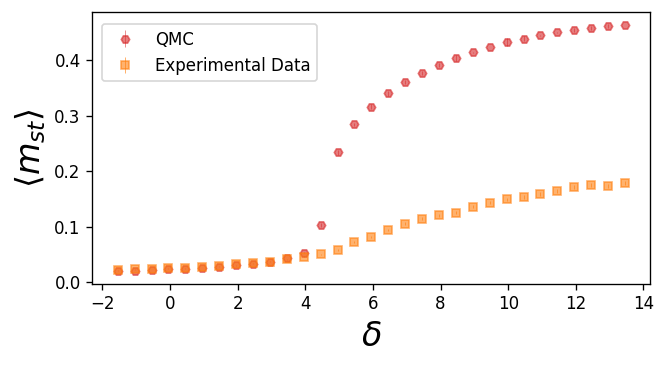

In [16]:
fig = plt.figure(1,figsize=(6,3), dpi=120, facecolor='w', edgecolor='k')
# plt.plot(deltas, chks, linestyle='None', marker='H', markerfacecolor='none', markeredgecolor='C6', markersize=5, linewidth=0.5, markeredgewidth=0.5, color='C6',label="QMC")
plt.errorbar(deltas, chks, yerr=chk_errors, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3',label="QMC")
# plt.scatter(deltas_lim,qmc_stagmags,color='C3',label='QMC samples stag mags')
# plt.errorbar(deltas_lim, qmc_stagmags, yerr=np.sqrt(qmc_vars),color='C3', ls='none')
# plt.plot(deltas, exp_stagmags, linestyle='None', marker='s', markerfacecolor='none', markeredgecolor='C1', markersize=5, linewidth=0.5, markeredgewidth=0.5, color='C1',label="Experimental Data")
plt.errorbar(deltas, exp_stagmags, yerr=np.sqrt(np.array(exp_vars))/np.sqrt(1000), marker='s', markerfacecolor='C1', markeredgecolor='C1', markersize=5, linewidth=0.6, alpha=0.6, linestyle='None', color='C1',label="Experimental Data")
plt.legend(loc='center', bbox_to_anchor=(0.21, 0.85),fontsize=10)
# plt.title('Staggered Magnetization',fontsize=25)
plt.ylabel('$\\langle m_{st} \\rangle$',fontsize=20)
plt.xlabel('$\\delta$',fontsize=20)
plt.show()

plot histogram for one delta value

# Plot Exp Stag Mags as box and whisker plots

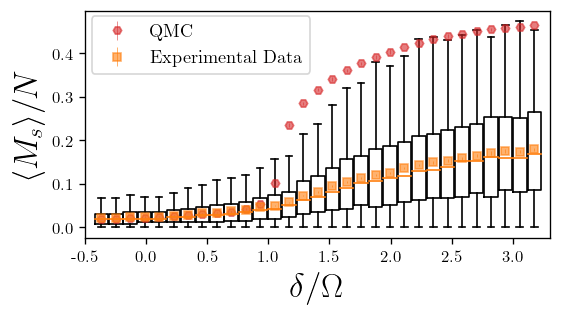

In [65]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(5,2.5), dpi=120, facecolor='w', edgecolor='k')
plt.errorbar(deltas, chks, yerr=chk_errors, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3',label="QMC")
plt.errorbar(deltas, exp_stagmags, yerr=np.sqrt(np.array(exp_vars))/np.sqrt(1000), marker='s', markerfacecolor='C1', markeredgecolor='C1', markersize=5, linewidth=0.6, alpha=0.6, linestyle='None', color='C1',label="Experimental Data")

plt.boxplot(abs(all_all_exp_stagmags),positions=deltas,showfliers = False,widths=0.11)
plt.ylabel('$\\langle M_{s} \\rangle/N$',fontsize=20)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.xticks(np.arange(-0.5,3.51,0.5),np.arange(-0.5,3.51,0.5))
plt.xlim(-0.5,3.3)
# plt.xticks([-2,0,2,4,6,8,10,12,14],[-2,0,2,4,6,8,10,12,14])
plt.legend(loc='center', bbox_to_anchor=(0.25, 0.85),fontsize=11)


plt.show()